## Document Loading

In order to create an application to chat with data.  
First we have to load the data into a format that can be used with a LLM

Langchain has ~80 document loaders.

Loaders deals with specifics of accessing and converting data

- Accessing:
    - Web site
    - Databases 
    - Youtube
    - arXiv (scholar papers)
- Data Types:
    - PDF
    - HTML
    - JSON
    - Word , powerpoint , txt

- Return a list of `Document` object

Document(page_content , metadata)

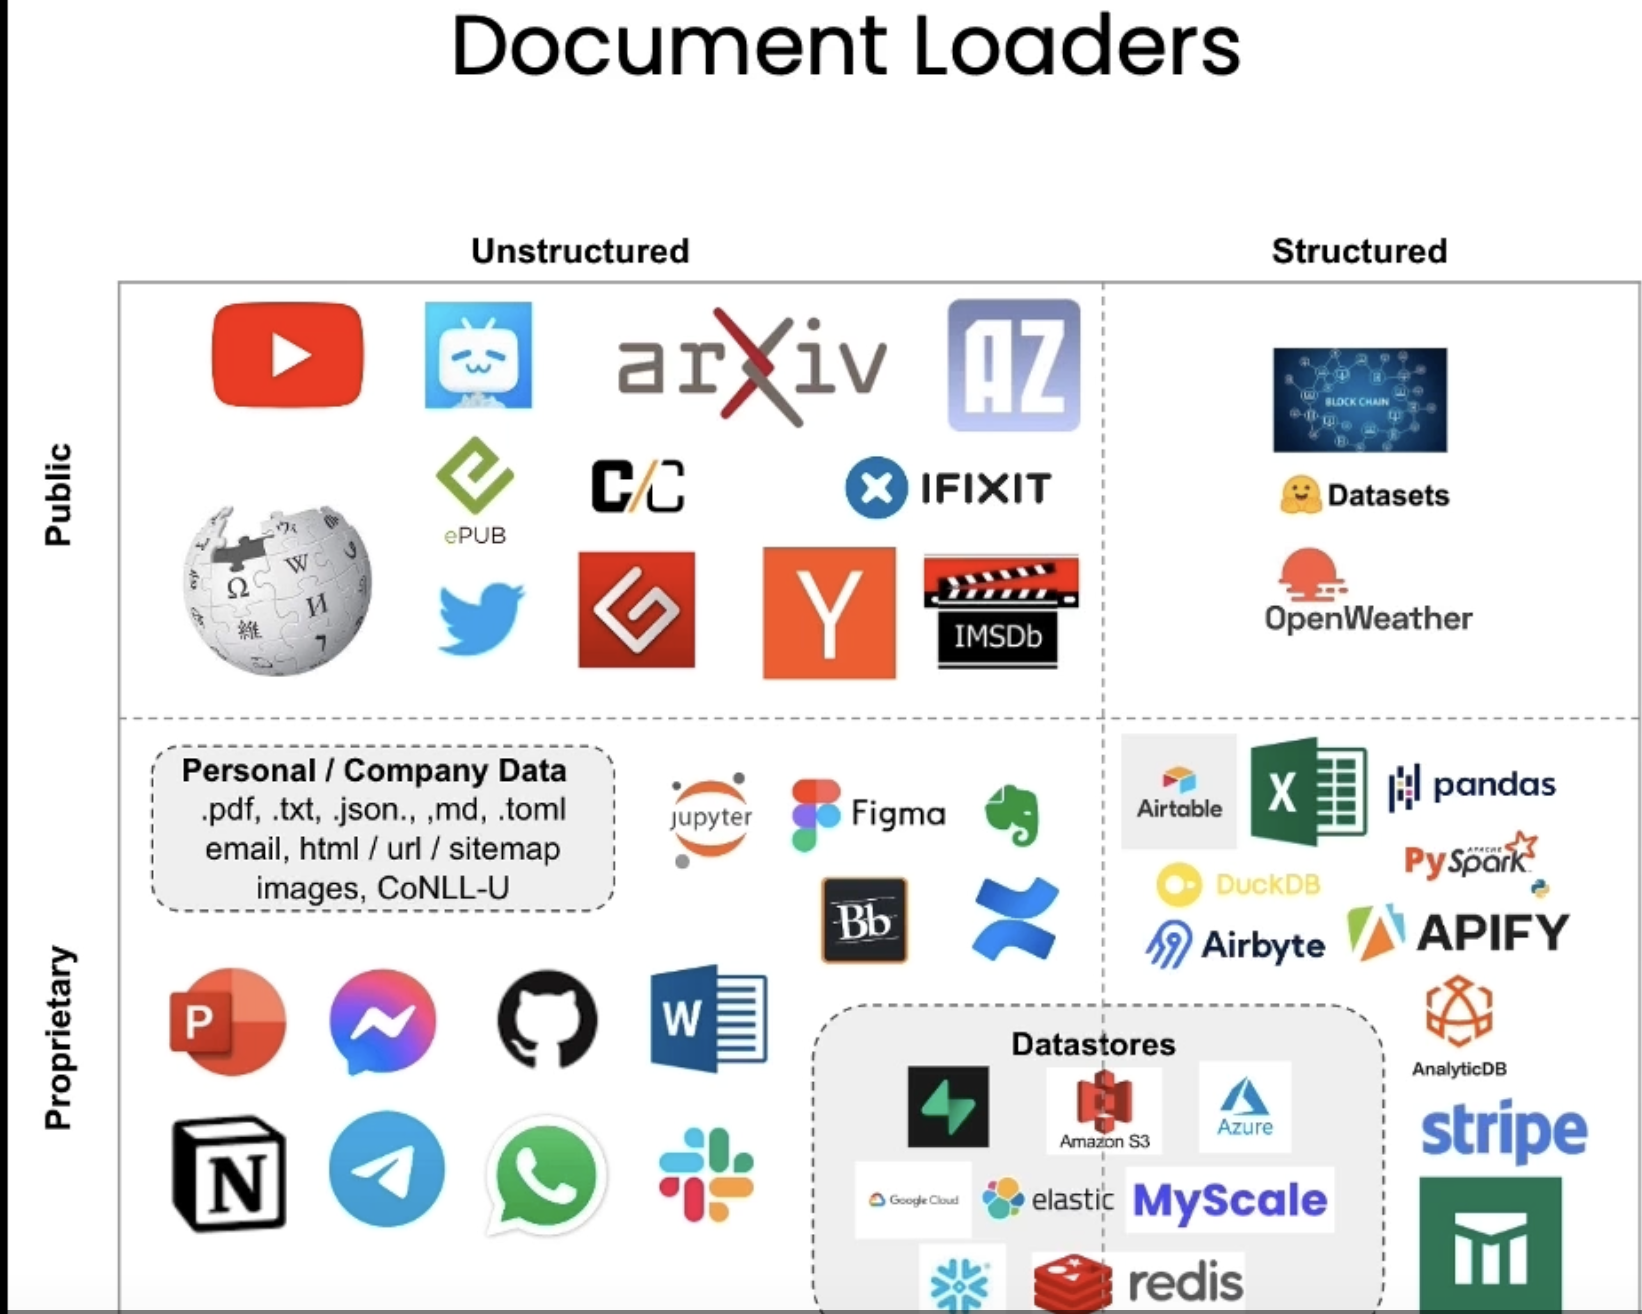

## Retrieval augmented generation
 
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution. 

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc). 

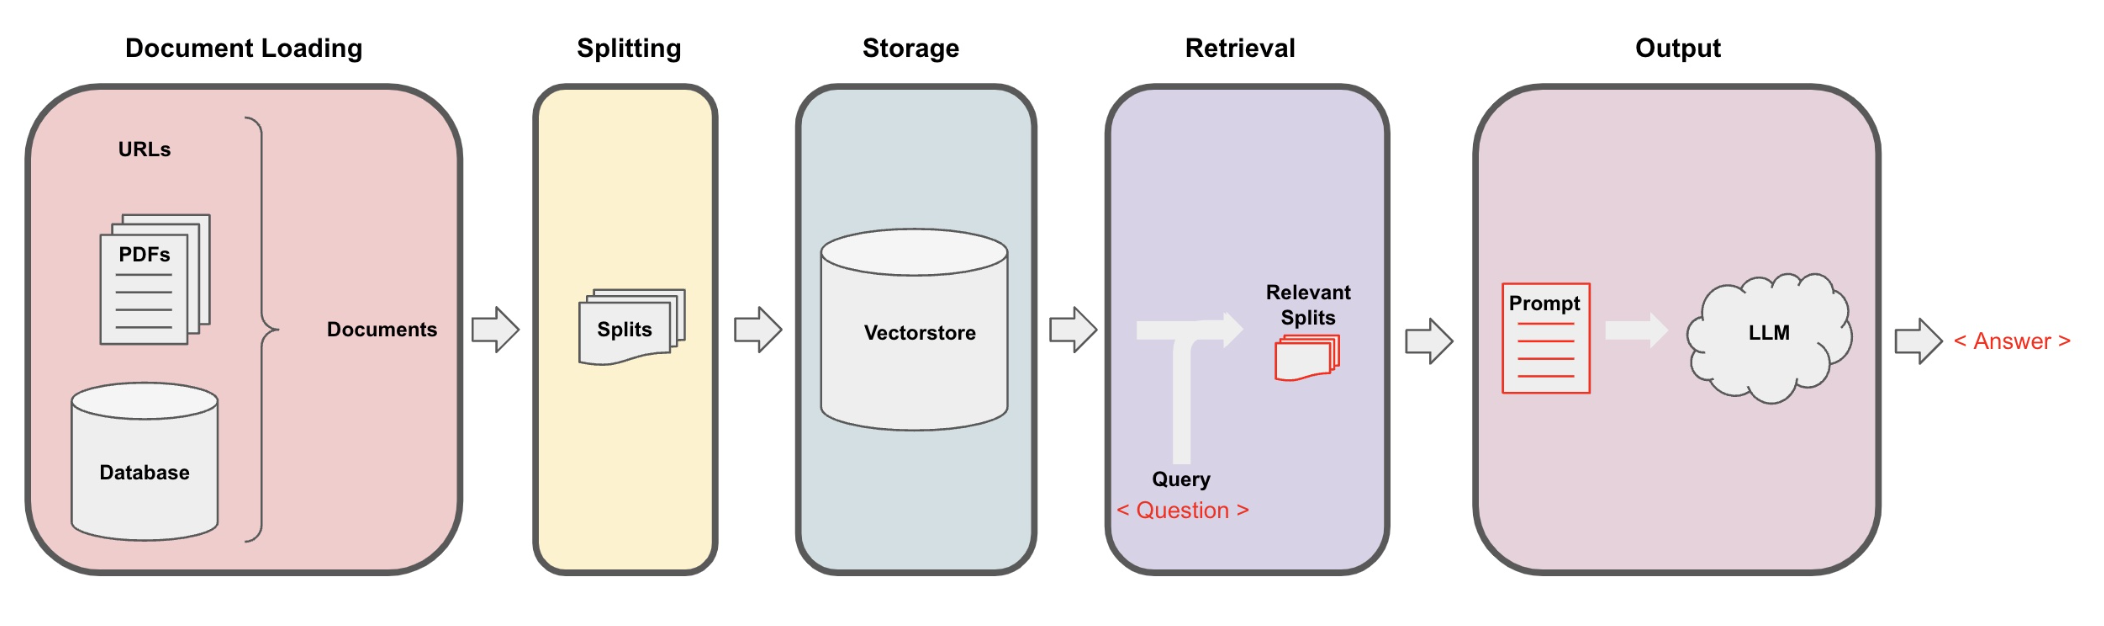

In [1]:
#! pip install pypdf

In [3]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("ml_doc.pdf")
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [5]:
len(pages)


22

In [7]:
print(pages[0].page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


## YouTube

use langchain youtube loader and openAI's whisper model , to transcribe audio to text

In [1]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [5]:
#  ! pip install yt_dlp
#  ! pip install pydub
# whisper parser is audio analyzer LLM
# youtube transcription needs ffmpeg installed - use brew install

In [2]:
url="https://youtu.be/keT866j7sfQ?si=enbifIAK_hQsYsq1" # espc fc 
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
) # downloads m4a file to be used by Whisper API


In [3]:
docs_youtube = loader.load()

[youtube] Extracting URL: https://youtu.be/keT866j7sfQ?si=enbifIAK_hQsYsq1
[youtube] keT866j7sfQ: Downloading webpage
[youtube] keT866j7sfQ: Downloading ios player API JSON
[youtube] keT866j7sfQ: Downloading android player API JSON
[youtube] keT866j7sfQ: Downloading m3u8 information
[info] keT866j7sfQ: Downloading 1 format(s): 140
[download] docs/youtube//‘He was AGGRESSIVE!’ How important could Rasmus Hojlund be for Man United？ ｜ ESPN FC.m4a has already been downloaded
[download] 100% of    3.12MiB
[ExtractAudio] Not converting audio docs/youtube//‘He was AGGRESSIVE!’ How important could Rasmus Hojlund be for Man United？ ｜ ESPN FC.m4a; file is already in target format m4a
Transcribing part 1!


In [4]:
print(len(docs_youtube))

docs_youtube

1


[Document(page_content="Okay, so let's talk about who they did come to did they bring in we got our first glimpse in the Premier League of Rasmus Hoyland Very excited. Yeah, very nice I thought there was a couple of rude really good touches if we need to score goals Leaky up the play It's not gonna be enough for club like United's So if he's clinical enough Okay, wait not gonna be enough given. He's only 20. I Mean I'm gonna play devil's advocate here. Mr. Contrarian last season They had a striker who just linked up the play and didn't score many goals and then they had Marcia also didn't score He's talking about Vagos. Yeah, and the Vagos didn't link the play Okay, but that's what they tried to get him to do I'm moving him deeper whatever right and despite all this despite all you guys mocking Vagos and despite Marcia's issues They said Ratched scored a million goals and they finished third in the Premier League, right? So we all agree Hoyland is better than big horse than Marcial and

## URLs

In [14]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/37signals-is-you.md")

In [15]:
docs = loader.load()